In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

#bring in the six packs
df_train = pd.read_csv('train.csv')
#check the decoration
print(df_train.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

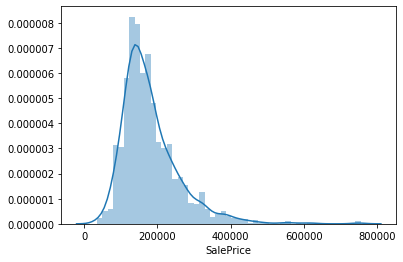

In [3]:
sns.distplot(df_train['SalePrice'])

In [4]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [5]:
def showDist(var = 'GrLivArea'):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
    print(data.corr())

           SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000


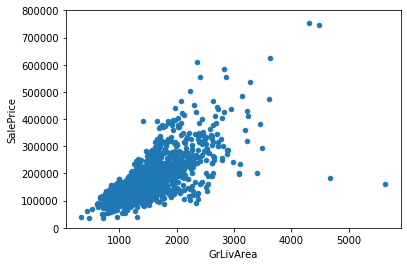

In [6]:
showDist('GrLivArea')

             SalePrice  TotalBsmtSF
SalePrice     1.000000     0.613581
TotalBsmtSF   0.613581     1.000000


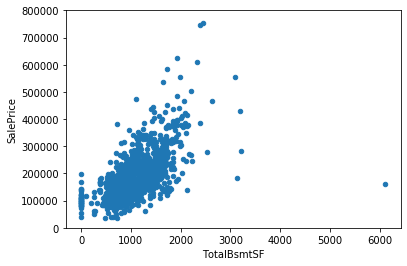

In [7]:
showDist('TotalBsmtSF')

In [8]:
def showBox(var):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

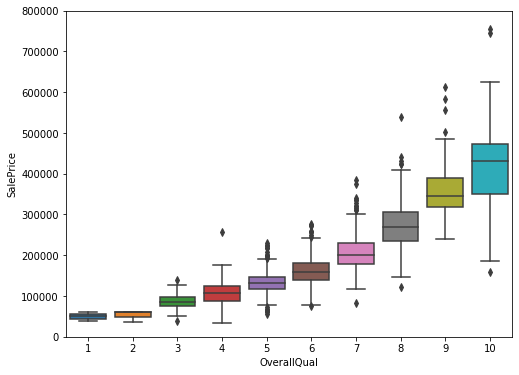

In [9]:
showBox('OverallQual')

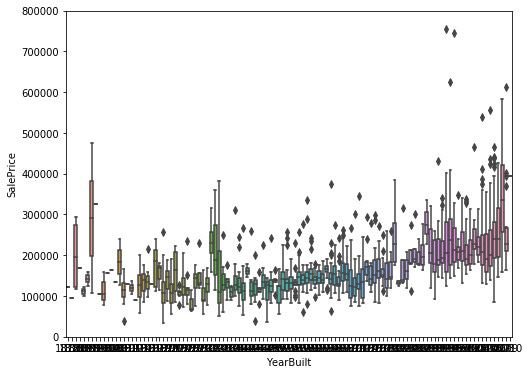

In [10]:
showBox('YearBuilt')

In [11]:
def showBox(var):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.violinplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

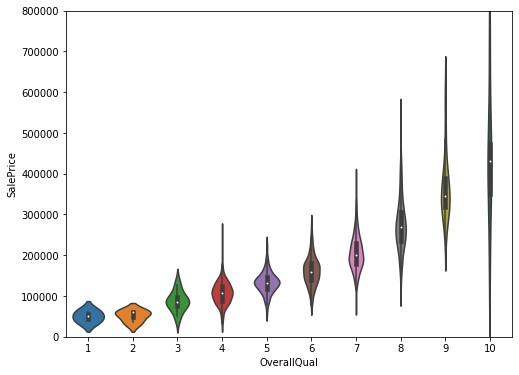

In [12]:
showBox('OverallQual')

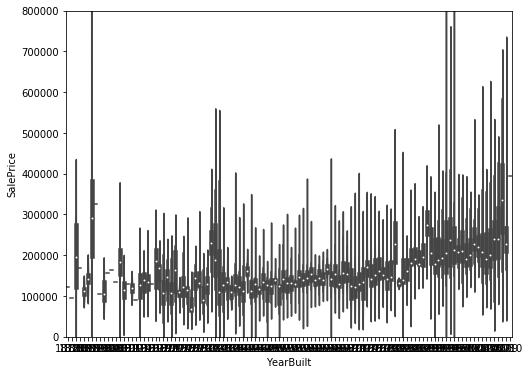

In [13]:
showBox('YearBuilt')

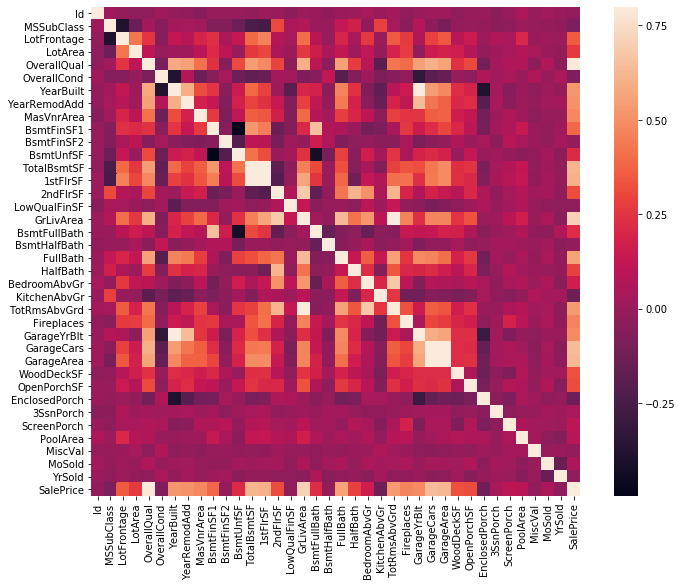

In [14]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


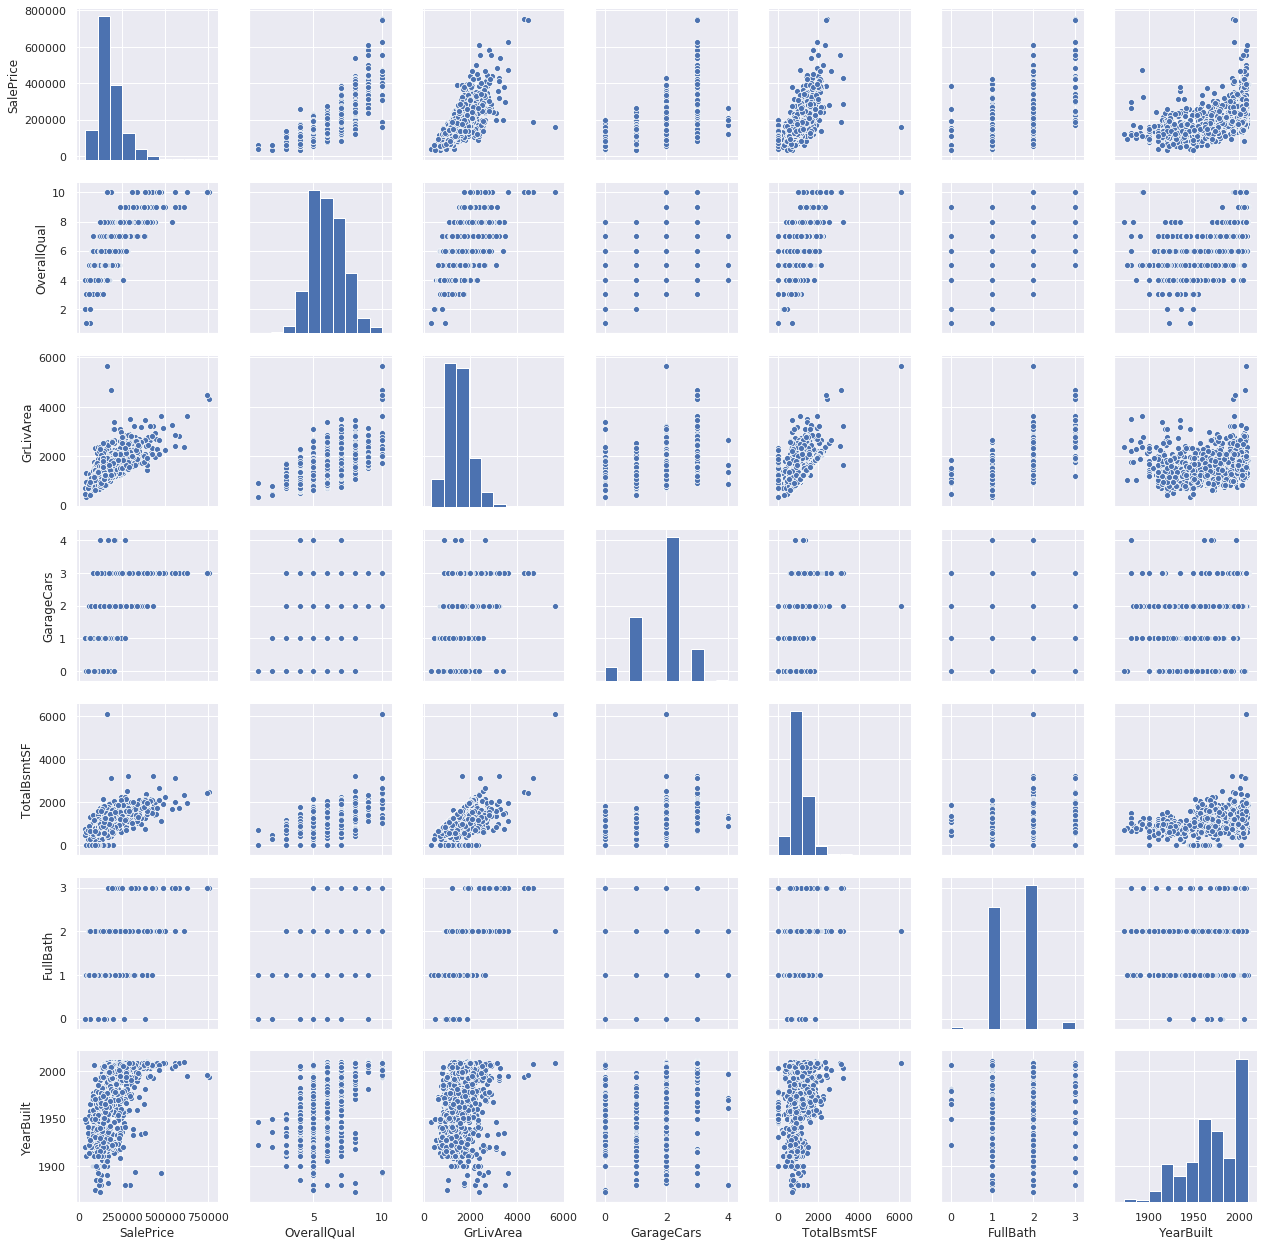

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

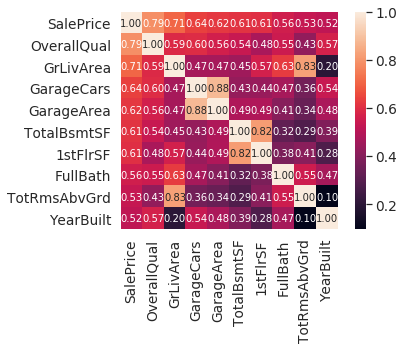

In [16]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.model_selection import train_test_split
from itertools import combinations

In [19]:
def linear_reg(features):
    print(features)
    x = np.stack([df_train[k] for k in features], axis=1)
    y = df_train['SalePrice']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    print(f'x_train.shape: {x_train.shape}, y_test.shape: {y_test.shape}' )
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    print(f'beta0: {linreg.intercept_}, coefficients: {linreg.coef_}')
    mse = mean_squared_error(y_test, linreg.predict(x_test))
    print(f'mean square error: {mse}')
    score = linreg.score(x_test, y_test)
    print(f'score is {score}')
    return features, score


In [20]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

In [21]:
linear_reg(features)

['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
x_train.shape: (1168, 4), y_test.shape: (292,)
beta0: -101440.13784433584, coefficients: [21420.72990087    51.8477607  16305.46886785    42.47278598]
mean square error: 2343624541.725653
score is 0.6504854006699597


(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], 0.6504854006699597)

In [22]:
for f in features:
    linear_reg([f])

['OverallQual']
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: -96469.57131873982, coefficients: [45411.99877916]
mean square error: 2630182608.9486394
score is 0.6077497891131334
['GrLivArea']
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 9592.751301926997, coefficients: [113.84071513]
mean square error: 4235182093.212431
score is 0.368389455715051
['GarageCars']
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 57846.13800447702, coefficients: [69696.23471598]
mean square error: 4401437660.079607
score is 0.34359506275431534
['TotalBsmtSF']
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 53984.78430741916, coefficients: [120.17206903]
mean square error: 5053269440.27035
score is 0.24638464383789496


In [23]:
scores = list()
feas = list()
for f in range(1,5):
    for item in combinations(features, f):
        fea, score = linear_reg(item)
        feas.append(fea)
        scores.append(score)

('OverallQual',)
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: -96469.57131873982, coefficients: [45411.99877916]
mean square error: 2630182608.9486394
score is 0.6077497891131334
('GrLivArea',)
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 9592.751301926997, coefficients: [113.84071513]
mean square error: 4235182093.212431
score is 0.368389455715051
('GarageCars',)
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 57846.13800447702, coefficients: [69696.23471598]
mean square error: 4401437660.079607
score is 0.34359506275431534
('TotalBsmtSF',)
x_train.shape: (1168, 1), y_test.shape: (292,)
beta0: 53984.78430741916, coefficients: [120.17206903]
mean square error: 5053269440.27035
score is 0.24638464383789496
('OverallQual', 'GrLivArea')
x_train.shape: (1168, 2), y_test.shape: (292,)
beta0: -105371.78047740777, coefficients: [31689.96681068    61.66175154]
mean square error: 2340142019.514209
score is 0.6510047638758488
('OverallQual', 'GarageCars')
x_train.shape: (

In [24]:
print(np.max(scores), feas[np.argmax(scores)])

0.6903531376744984 ('OverallQual', 'GrLivArea', 'GarageCars')
